# 3 Linear Regression in Scikit-learn (40%)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import seaborn; seaborn.set()

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [3]:
#print(type(diabetes.data))
#print(diabetes.data.shape)
#print(diabetes.data[:5])

#### Q1. Get n_features and n_samples. (5%)

In [4]:
print('Number of features in the Diabetes dataset is: %s' % str(diabetes.data.shape[1]))
print('Number of samples in the Diabetes dataset is: %s' % str(diabetes.data.shape[0]))

Number of features in the Diabetes dataset is: 10
Number of samples in the Diabetes dataset is: 442


#### Q2. Find out how each feature fits the disease progression. (15%)

In [5]:
# which feature
# i_feature = 0

# Get the feature name
feature_names = ['Age', 'Sex', 'Body mass index', 'Average blood pressure', 'S1',
                 'S2', 'S3', 'S4', 'S5', 'S6']

In [6]:
# set two lists to save the results
order_list_of_feature_name = []
order_list_of_model_score = []

In [7]:
# loop through the name list
for i_feature, feature_name in enumerate(feature_names):
    # Use only one feature
    diabetes_X = diabetes.data[:, np.newaxis, i_feature]
    
    # Split the data into training/testing sets
    diabetes_X_train = diabetes_X[:-20]
    diabetes_X_test = diabetes_X[-20:]
    
    # Split the targets into training/testing sets
    diabetes_y_train = diabetes.target[:-20]
    diabetes_y_test = diabetes.target[-20:]
    
    # Create linear regression object
    model = linear_model.LinearRegression()
    
    # Train the model using the training sets
    model.fit(diabetes_X_train, diabetes_y_train)
    
    # Explained variance score: score=1 is perfect prediction
    model_score = model.score(diabetes_X_test, diabetes_y_test)
    
    # save to the list
    order_list_of_feature_name.append(feature_name)
    order_list_of_model_score.append(model_score)

In [8]:
print('Order list of feature name is: %s' % str(order_list_of_feature_name))
print('Order list of model score is: %s' % str(order_list_of_model_score))

Order list of feature name is: ['Age', 'Sex', 'Body mass index', 'Average blood pressure', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
Order list of model score is: [-0.1327020163062087, -0.13883792137588857, 0.4725754479822714, 0.15995117339547205, -0.16094176987655562, -0.15171870558113, 0.060610607792839555, -0.004070338973065635, 0.3948984231023219, -0.08990371992812851]


#### Q3. Calculate the loss function. (5%)

In [9]:
# define mse function to compute
def mse(X_test, y_test, model):
    return np.mean((model.predict(X_test) - y_test)**2)

In [10]:
# read the best fit model again, which is the largest R-squared score.
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]
model = linear_model.LinearRegression().fit(diabetes_X_train, diabetes_y_train)

In [11]:
# compute the mse
model_mse = mse(diabetes_X_test, diabetes_y_test, model)

In [12]:
# print the result
print('Value of the loss function for the best fitted model is: %s' % str(model_mse))

Value of the loss function for the best fitted model is: 2548.0723987259694


#### Q4. Plot the predictions and test data. (15%)

In [13]:
# plot the real y
plt.scatter(diabetes_X_test, diabetes_y_test, c='r', marker='o', 
           label='real test set')

In [14]:
# plot the pred y
plt.scatter(diabetes_X_test, model.predict(diabetes_X_test), c='b', 
           marker='X', label='real test set')

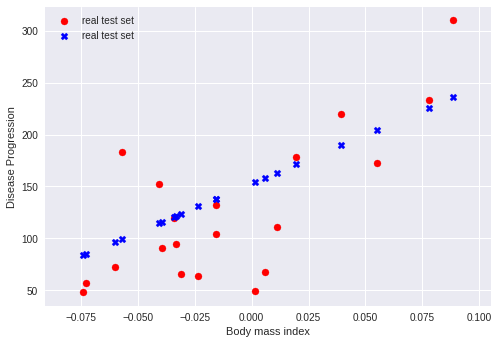

In [15]:
# set the labels
plt.xlabel(feature_names[2])
plt.ylabel('Disease Progression')
plt.legend(loc='best')
plt.show()

# Naive Bayes Classification in Scikit-learn (60%)

In [16]:
import scipy.io as sio
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB

#### 1. Load the train.mat data. (10%)

In [17]:
path_train = 'train.mat'
path_test = 'test.mat'

In [18]:
# Read the mat file by scipy.io.
# Since the return is 'dict', take the useful parts.
X_train = sio.loadmat(path_train)['Xtrain']
y_train = sio.loadmat(path_train)['ytrain']

In [19]:
# What are n_features and n_samples?
print('Number of features in the Diabetes dataset is: %s' % str(X_train.shape[1]))
print('Number of samples in the Diabetes dataset is: %s' % str(X_train.shape[0]))

Number of features in the Diabetes dataset is: 1899
Number of samples in the Diabetes dataset is: 6665


#### Choose a naive claffifier fron GaussianNB, MultinomialNB, BernoulliNB for the problem.

The reason to choose Multinomial Naive Bayes is because the document mentions that "..., and is one of the two classic naive Bayes variants used in text classification ...", and I think the dataset is similar to the document mentioned, which the distribution is parametrized by word vectors.

In [20]:
mnb = MultinomialNB(alpha=1e-10).fit(X_train, y_train.ravel())

In [21]:
# How accurate is the classifier on the training data?
# Calculate and print out the accuracy.
model_score = mnb.score(X_train, y_train.ravel())
print('The accuracy of the classifier: %s' % str(model_score))

The accuracy of the classifier: 0.9836459114778695


In [22]:
# 3. Load the test data test.mat and get predictions for the Xtest. (20%)
X_test = sio.loadmat(path_test)['Xtest']
y_pred = mnb.predict(X_test)
print('Number of samples in the predicted dataset is: %s' % str(y_pred.shape[0]))

Number of samples in the predicted dataset is: 1667


In [23]:
# Write the results to the file prediction.txt.
# Each line in prediction.txt is the corresponding label for the data point.
output_path = 'prediction.txt'
np.savetxt(output_path, y_pred, fmt='%d')

# For Benchmark

### BernoulliNB

In [24]:
bnb = BernoulliNB(alpha=1e-10).fit(X_train, y_train.ravel())
bnb_score = bnb.score(X_train, y_train.ravel())
print('The accuracy of the bernoulli naive bayes classifier: %s' % str(bnb_score))

The accuracy of the bernoulli naive bayes classifier: 0.9384846211552889


### GaussianNB

In [25]:
gnb = GaussianNB().fit(X_train, y_train.ravel())
gnb_score = gnb.score(X_train, y_train.ravel())
print('The accuracy of the gaussian naive bayes classifier: %s' % str(gnb_score))

The accuracy of the gaussian naive bayes classifier: 0.9249812453113279
